Test permutations of given graph: 100%|██████████| 20/20 [05:35<00:00, 16.80s/it]


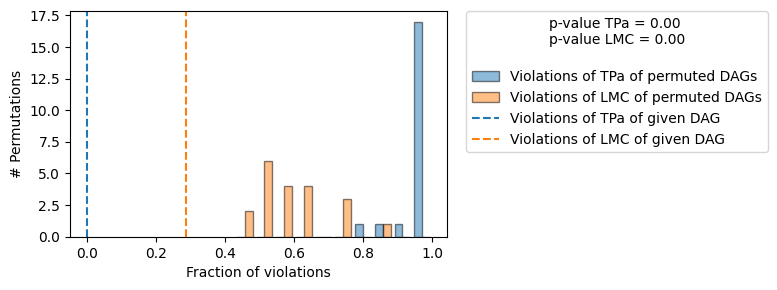

In [3]:
import networkx as nx
import pandas as pd 
from dowhy.gcm.falsify import FalsifyConst, falsify_graph, plot_local_insights, run_validations, apply_suggestions
from dowhy.gcm.util import plot
data = pd.read_csv('/home/cc/slurm_log_buff.csv')
select_cols = ['nodes_alloc', 
    'cpus_alloc', 
    'mem_alloc', 
    'num_alloc_gpus',
    'runtime',
    'system_load',
    'node_hours',
    #'user_job_frequency',
    'status'] 
data = data[select_cols]
rename_cols = {
    'nodes_alloc': 'nodes_alloc_cat', 
    'cpus_alloc': 'cpus_alloc_cat', 
    'mem_alloc': 'mem_alloc_cat', 
    'num_alloc_gpus': 'gpu_cat',
    'runtime': 'runtime_bin',
    'system_load': 'system_load_cat',
    'node_hours': 'node_hours_bin',
    #'user_job_frequency': 'user_job_frequency',
   
}
data = data.rename(columns=rename_cols)
g_test = nx.read_gml('ges_disc_mixed_bic_d_2.gml')
#for  col in data.columns:
#    data[col] = data[col].astype('category').cat.codes

result = falsify_graph(g_test, data, plot_histogram=True, n_jobs=10, suggestions=True, show_progress_bar=True)



In [4]:
print(result)

+-------------------------------------------------------------------------------------------------------+
|                                         Falsification Summary                                         |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is informative because 0 / 20 of the permutations lie in the Markov                     |
| equivalence class of the given DAG (p-value: 0.00).                                                   |
| The given DAG violates 4/14 LMCs and is better than 100.0% of the permuted DAGs (p-value: 0.00).      |
| Based on the provided significance level (0.05) and because the DAG is informative,                   |
| we do not reject the DAG.                                                                             |
+-------------------------------------------------------------------------------------------------------+
|                                             

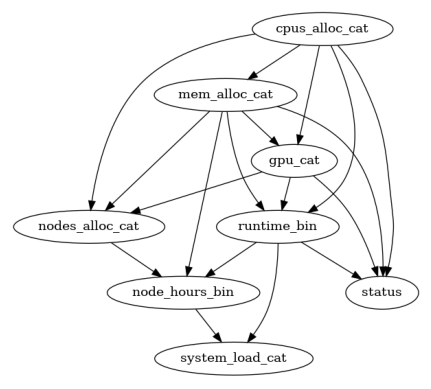

In [12]:
plot_local_insights(g_test, result, method=FalsifyConst.VALIDATE_LMC)

In [ ]:
#notes partition was violating lmc so removed it and it was just a sink node 

In [23]:
#pnl
from causallearn.search.FCMBased.PNL.PNL import PNL
pc_df = pd.read_csv('mixed_pillai_.csv')
pnl = PNL()
pairs = [['runtime', 'system_load'],['nodes_alloc','cpus_alloc'],['nodes_alloc','mem_alloc'],['cpus_alloc','mem_alloc']]
for pair in pairs:
    data_x = pc_df[pair[0]].to_numpy().reshape(-1,1)
    data_y = pc_df[pair[1]].to_numpy().reshape(-1,1)
    p_value_foward, p_value_backward = pnl.cause_or_effect(data_x, data_y)
    print(f'Pair: {pair}, P-Value Forward: {p_value_foward}, P-Value Backward: {p_value_backward}')
    if p_value_foward > p_value_backward:
        print(f'Inferred Causal Direction: {pair[0]} -> {pair[1]}')
    else:
        print(f'Inferred Causal Direction: {pair[1]} -> {pair[0]}')

KeyboardInterrupt: 

In [ ]:

g_test = nx.read_gml('pc_cont_mixed_pillai.gml')

result = falsify_graph(g_test, data, plot_histogram=True, n_jobs=10, suggestions=True)

print(result)


In [ ]:
#ACE estimation 
import dowhy.gcm as gcm
data = pd.read_csv('/home/cc/slurm_log_buff.csv')
causal_model = nx.read_gml('ges_disc_mixed_bic_d_2.gml')
select_cols = ['nodes_alloc', 
    'cpus_alloc', 
    'mem_alloc', 
    'num_alloc_gpus',
    'runtime',
    'system_load',
    'node_hours',
    #'user_job_frequency',
    'status'] 
data = data[select_cols]
rename_cols = {
    'nodes_alloc': 'nodes_alloc_cat', 
    'cpus_alloc': 'cpus_alloc_cat', 
    'mem_alloc': 'mem_alloc_cat', 
    'num_alloc_gpus': 'gpu_cat',
    'runtime': 'runtime_bin',
    'system_load': 'system_load_cat',
    'node_hours': 'node_hours_bin',
    #'user_job_frequency': 'user_job_frequency',
   
}
data = data.rename(columns=rename_cols)
causal_model = nx.DiGraph(causal_model)  # convert to DiGraph if needed
gcm.auto.assign_causal_mechanisms(causal_model, data)

gcm.fit(causal_model, data)

AttributeError: 'dict' object has no attribute 'is_directed'

In [ ]:
gcm.average_causal_effect(causal_model, 'status', interventions_alternative={'gpu_cat': lambda x: 1}, interventions_reference={'gpu_cat': lambda x: 0})